In [1]:
# import libraries
import json, os, requests

In [2]:
# cognitive service access key
SUB_KEY = 'YOUR_COGNITIVE_SERVICES_ACCESS_KEY'

In [6]:
# Cognitive service resource base domain
# (this gets available once a  Cognitive service resource gets created)
COGNITIVE_SERVICES_BASE_DOMAIN = 'https://YOUR_COGNITIVE_SERVICE_RESOURCE_NAME.cognitiveservices.azure.com'

In [7]:
# face detection endpoint 
# specify that face v1 will be used
# according to thew docs "/detect" endpoint detects human faces in an image, return face rectangles, and optionally with faceIds, landmarks, and attributes.
FACE_RECOGNITION_API = COGNITIVE_SERVICES_BASE_DOMAIN + '/face/v1.0/detect'

In [8]:
# image that will be used as input for face recognition
targetImage = 'YOUR_IMAGE_URL'

In [9]:
# define request headers
# "Ocp-Apim-Subscription-Key" is an special header that azure uses
# in order to authenticate and authorize the usage of the endpoint "/face/v1.0/detect"
headers = {
    'Ocp-Apim-Subscription-Key' : SUB_KEY
}

In [10]:
# define query parameters
params = {
    'returnFaceId': 'false',        # Return faceIds of the detected faces or not
    'returnFaceLandmarks': 'false'  # Return face landmarks of the detected faces or not. 
}

In [11]:
# perform an HTTP request
response = requests.post(
    FACE_RECOGNITION_API,
    params = params,
    headers = headers,
    json = {
        'url': targetImage
    }
)

In [12]:
# log response
print(json.dumps(response.json()))

[{"faceRectangle": {"top": 62, "left": 50, "width": 101, "height": 101}}]


In [31]:
# retrieving detected face bounding box
faceBoundingBox = response.json()[0]['faceRectangle']

In [28]:
# import Image and BytesIO classes
from PIL import Image, ImageDraw
from io import BytesIO

In [37]:
# perform GET HTTP request to download image
blob = requests.get(targetImage)

In [38]:
# parses blob as Image
image = Image.open(BytesIO(blob.content))

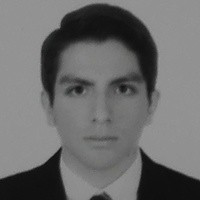

In [39]:
image

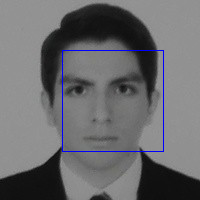

In [40]:
# create instace of ImageDraw
faceDetectedImage = ImageDraw.Draw(image)

# drawing boundaries of the deceted face based on the given boundingBox
faceDetectedImage.rectangle([
    (faceBoundingBox['top'], faceBoundingBox['left']), 
    (faceBoundingBox['top'] + faceBoundingBox['width'], faceBoundingBox['left'] + faceBoundingBox['height'])
  ], outline="blue")

# display image 
image.show()